In [52]:
#import necessary libraries
import requests
import json
import pandas as pd
import numpy as np

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [53]:
#initialize list of player IDs
playerIDs = []

def get_playerIDs():
    del playerIDs[:]
    #URL for player stats
    players_url = 'http://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=08%2F01%2F2017&DateTo=01%2F10%2F2018&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&VsConference=&VsDivision=&Weight='

    #for some reason, stats.nba.com seems to be blocking requests, but I found a workaround by setting up the request headers to match that of my browser
    headers = {'Accept': 'application/json, text/plain, */*',
              'Accept-Encoding': 'gzip, deflate, br',
              'Accept-Language': 'en-US,en;q=0.9,ko;q=0.8,it;q=0.7',
              'Connection': 'keep-alive',
              'Cookie': 's_cc=true; s_fid=58934926698E1622-1EFF83B875B92BD6; s_vi=[CS]v1|2D122DED85030B7C-600011846000BA7C[CE]; ASP.NET_SessionId=hz2hnihwtkklykyio3bwuncz; globalUserOrderId=Id=; bSID=Id=202843ae-ab57-4447-98fc-2ba650e04e46; mmapi.store.p.0=%7B%22mmparams.d%22%3A%7B%7D%2C%22mmparams.p%22%3A%7B%22pd%22%3A%221545070715833%7C%5C%221554846393%7CAQAAAApVAgDdTfzdow8AAREAAUIBpXMpAQAPS56WekXVSA9LnpZ6RdVIAAAAAP%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FAAZEaXJlY3QBow8BAAAAAAAAAQAA%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FBAB5SAAAGodctJOjDwD%2F%2F%2F%2F%2FAaMPow%2F%2F%2FwEAAAEAAAAAAd6xAADOGQEAAPhTAACY6UAK7qMPAP%2F%2F%2F%2F8Bow%2BjD%2F%2F%2FAQAAAQAAAAAB98sAAAFEAQAA1bwAAKphasrSow8A%2F%2F%2F%2F%2FwGjD6MP%2F%2F8BAAABAAAAAAHgrAEAfI8CAADJqwAAMpXF9jmjDwD%2F%2F%2F%2F%2FAaMPow%2F%2F%2FwEAAAEAAAAAAbOJAQAFWQIAAAAAAAAAAUU%3D%5C%22%22%2C%22srv%22%3A%221545070715858%7C%5C%22nycvwcgus02%5C%22%22%7D%7D; mmapi.store.s.0=%7B%22mmparams.d%22%3A%7B%7D%2C%22mmparams.p%22%3A%7B%7D%7D; s_fuid=63825255262426291542233648768471346134; s_pers=%20s_last_team%3DNew%2520York%2520Knicks%7C1545070716985%3B; _4c_=fVPdTuM8EH2VlS%2B4KvVf7NiVKtSWIrH7URbaRdorZOJJG7VNIseBDyHenUlpuwhWm0rVzPGZmeOZ8Qt5WkFJBlxxqaTizKhE9MganhsyeCFZ3f0%2F7szKAxkQbvtJX5AeacMG3VWM9YDSJlYB%2BuWD62fVlm7ALVugs%2FGIRnBbOoOn%2B99VWN%2F%2FKIts3dDMRVhW4ZlKZhL6EKqnBmgOLrYBfB0q32aRCsMEV5bWLsQSQuEpF6nQtKnakAF1a26TBCue1ht31qzboVXMSGtQ2nxV1HVRLq8griqPKmcI%2FsSwlWvAz90GLiNs9%2Fj1tizuXEjsApr4CTNfMaX%2BgumvmPnIm1RtXZW%2FsPge%2BG%2FXoeuwwPYcheFZFx88hMvzD86d27Rd67tLuCUsnuuDNz%2FwbgF7V%2BKVJy2OYgvhYy68KwooOzGIvbe7I0xWAanftEQ0x0GTzDIQudRMpQljMudSGJ%2FkFhQIIxVDXoVrQa5chmaAHEI4lGqK2KnKXelikTXdHiAaIWy7iE7L1eL2fjwdTa5nf%2FbmSOdc9EWV9kuI9IE2zfHEw2MPbRw0WpTT7%2FNTjhsoaSOsVkYwlXCNoz8b3YyH%2FCQv%2FFAZKxMrtLZmyrUQp3x6cWHk2KRqbMX4XJ%2BMbqZDjppq3GzSGZsqw61AB9%2FCa4%2F8%2F%2F4gtEBZWrMULxJx243GtuCHDNzH%2FcsgMmMZMx6ET13unXLeAYdUZJIlhtku%2FS6f4JKzVCj8YYIa8%2B3i%2BbGcSuyunNyX48mxXCf0E%2FsgTn8V9z7if8SYzzGvr28%3D; fsr.s={"f":1513535109275}; __gads=ID=3fcb48e97bf2e17b:T=1513643140:S=ALNI_Ma_GcnJLBJXZHp2spIpMyQ_tq-egw; _parsely_visitor={%22id%22:%2205bcee40-6330-4d4c-8555-418719d7b9ec%22%2C%22session_count%22:2%2C%22last_session_ts%22:1514577879463}; _ga=GA1.2.539792339.1515110937; _gid=GA1.2.1010385756.1515633192; ug=5a385c7c0e2aac0a3c732e33dc03d3b6; ugs=1; s_sq=fanaticsdev%252Cfannbadev%3D%2526pid%253Dnba%252520store%25253Anba%25253Anew%252520york%252520knicks%2526pidt%253D1%2526oid%253Dfunctionhide%252528%252529%25257Bmodal.style%25255B%252527display%252527%25255D%25253Doverlay.style%25255B%252527display%252527%25255D%25253D%252527none%252527%25257D%2526oidt%253D2%2526ot%253DA; _gat=1',
              'Host': 'stats.nba.com',
              'Referer': 'https://stats.nba.com/player/202689/shots-dash/',
              'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36',
              'x-nba-stats-origin': 'stats',
              'x-nba-stats-token': 'true'}

    #create dict based on JSON response
    response = requests.get(players_url, headers=headers)
    players_json = response.json()['resultSets'][0]['rowSet']
    data = json.loads(response.text)
    
    #count of players
    number_players = len(data['resultSets'][0]['rowSet'])
    
    for i in range(0, number_players):
        playerID_data = data['resultSets'][0]['rowSet'][i][0] #set playerID_data to current playerID
        playerIDs.append(playerID_data) #append playerID_data to list playerIDs


In [54]:
get_playerIDs()

In [55]:
df_shot_chart_detail = pd.DataFrame()

In [56]:
shot_chart_detail = {
    "GRID_TYPE" : None,
    "GAME_ID" : None,
    "GAME_EVENT_ID" : None,
    "PLAYER_ID" : None,
    "PLAYER_NAME" : None,
    "TEAM_ID" : None,
    "TEAM_NAME" : None,
    "PERIOD" : None,
    "MINUTES_REMAINING" : None,
    "SECONDS_REMAINING" : None,
    "EVENT_TYPE" : None,
    "ACTION_TYPE" : None,
    "SHOT_TYPE" : None,
    "SHOT_ZONE_BASIC" : None,
    "SHOT_ZONE_AREA" : None,
    "SHOT_ZONE_RANGE" : None,
    "SHOT_DISTANCE" : None,
    "LOC_X" : None,
    "LOC_Y" : None,
    "SHOT_ATTEMPTED_FLAG" : None,
    "SHOT_MADE_FLAG" : None,
    "GAME_DATE" : None,
    "HTM" : None,
    "VTM" : None
}

In [57]:
def get_shots(player_id):
    global df_shot_chart_detail

    #URL for shot chart data from NBA Stats API, with player ID set as a variable so we can iterate through players
    shot_chart_url = 'https://stats.nba.com/stats/shotchartdetail?AheadBehind=&CFID=33&CFPARAMS=2017-18&ClutchTime=&Conference=&ContextFilter=&ContextMeasure=FGA&DateFrom=&DateTo=&Division=&EndPeriod=10&EndRange=28800&GROUP_ID=&GameEventID=&GameID=&GameSegment=&GroupID=&GroupMode=&GroupQuantity=5&LastNGames=0&LeagueID=00&Location=&Month=0&OnOff=&OpponentTeamID=0&Outcome=&PORound=0&Period=0&PlayerID='  + str(player_id) + '&PlayerID1=&PlayerID2=&PlayerID3=&PlayerID4=&PlayerID5=&PlayerPosition=&PointDiff=&Position=&RangeType=0&RookieYear=&Season=2017-18&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StartPeriod=1&StartRange=0&StarterBench=&TeamID=0&VsConference=&VsDivision=&VsPlayerID1=&VsPlayerID2=&VsPlayerID3=&VsPlayerID4=&VsPlayerID5=&VsTeamID='
    
    #for some reason, stats.nba.com seems to be blocking requests, but I found a workaround by setting up the request headers to match that of my browser
    headers = {'Accept': 'application/json, text/plain, */*', 
               'Accept-Encoding': 'gzip, deflate, br',
               'Accept-Language': 'en-US,en;q=0.9,ko;q=0.8,it;q=0.7',
               'Connection': 'keep-alive',
               'Cookie': 's_cc=true; s_fid=58934926698E1622-1EFF83B875B92BD6; s_vi=[CS]v1|2D122DED85030B7C-600011846000BA7C[CE]; ASP.NET_SessionId=hz2hnihwtkklykyio3bwuncz; globalUserOrderId=Id=; bSID=Id=202843ae-ab57-4447-98fc-2ba650e04e46; mmapi.store.p.0=%7B%22mmparams.d%22%3A%7B%7D%2C%22mmparams.p%22%3A%7B%22pd%22%3A%221545070715833%7C%5C%221554846393%7CAQAAAApVAgDdTfzdow8AAREAAUIBpXMpAQAPS56WekXVSA9LnpZ6RdVIAAAAAP%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FAAZEaXJlY3QBow8BAAAAAAAAAQAA%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FBAB5SAAAGodctJOjDwD%2F%2F%2F%2F%2FAaMPow%2F%2F%2FwEAAAEAAAAAAd6xAADOGQEAAPhTAACY6UAK7qMPAP%2F%2F%2F%2F8Bow%2BjD%2F%2F%2FAQAAAQAAAAAB98sAAAFEAQAA1bwAAKphasrSow8A%2F%2F%2F%2F%2FwGjD6MP%2F%2F8BAAABAAAAAAHgrAEAfI8CAADJqwAAMpXF9jmjDwD%2F%2F%2F%2F%2FAaMPow%2F%2F%2FwEAAAEAAAAAAbOJAQAFWQIAAAAAAAAAAUU%3D%5C%22%22%2C%22srv%22%3A%221545070715858%7C%5C%22nycvwcgus02%5C%22%22%7D%7D; mmapi.store.s.0=%7B%22mmparams.d%22%3A%7B%7D%2C%22mmparams.p%22%3A%7B%7D%7D; s_fuid=63825255262426291542233648768471346134; s_pers=%20s_last_team%3DNew%2520York%2520Knicks%7C1545070716985%3B; _4c_=fVPdTuM8EH2VlS%2B4KvVf7NiVKtSWIrH7URbaRdorZOJJG7VNIseBDyHenUlpuwhWm0rVzPGZmeOZ8Qt5WkFJBlxxqaTizKhE9MganhsyeCFZ3f0%2F7szKAxkQbvtJX5AeacMG3VWM9YDSJlYB%2BuWD62fVlm7ALVugs%2FGIRnBbOoOn%2B99VWN%2F%2FKIts3dDMRVhW4ZlKZhL6EKqnBmgOLrYBfB0q32aRCsMEV5bWLsQSQuEpF6nQtKnakAF1a26TBCue1ht31qzboVXMSGtQ2nxV1HVRLq8griqPKmcI%2FsSwlWvAz90GLiNs9%2Fj1tizuXEjsApr4CTNfMaX%2BgumvmPnIm1RtXZW%2FsPge%2BG%2FXoeuwwPYcheFZFx88hMvzD86d27Rd67tLuCUsnuuDNz%2FwbgF7V%2BKVJy2OYgvhYy68KwooOzGIvbe7I0xWAanftEQ0x0GTzDIQudRMpQljMudSGJ%2FkFhQIIxVDXoVrQa5chmaAHEI4lGqK2KnKXelikTXdHiAaIWy7iE7L1eL2fjwdTa5nf%2FbmSOdc9EWV9kuI9IE2zfHEw2MPbRw0WpTT7%2FNTjhsoaSOsVkYwlXCNoz8b3YyH%2FCQv%2FFAZKxMrtLZmyrUQp3x6cWHk2KRqbMX4XJ%2BMbqZDjppq3GzSGZsqw61AB9%2FCa4%2F8%2F%2F4gtEBZWrMULxJx243GtuCHDNzH%2FcsgMmMZMx6ET13unXLeAYdUZJIlhtku%2FS6f4JKzVCj8YYIa8%2B3i%2BbGcSuyunNyX48mxXCf0E%2FsgTn8V9z7if8SYzzGvr28%3D; fsr.s={"f":1513535109275}; __gads=ID=3fcb48e97bf2e17b:T=1513643140:S=ALNI_Ma_GcnJLBJXZHp2spIpMyQ_tq-egw; _parsely_visitor={%22id%22:%2205bcee40-6330-4d4c-8555-418719d7b9ec%22%2C%22session_count%22:2%2C%22last_session_ts%22:1514577879463}; _ga=GA1.2.539792339.1515110937; _gid=GA1.2.1010385756.1515633192; ug=5a385c7c0e2aac0a3c732e33dc03d3b6; ugs=1; s_sq=fanaticsdev%252Cfannbadev%3D%2526pid%253Dnba%252520store%25253Anba%25253Anew%252520york%252520knicks%2526pidt%253D1%2526oid%253Dfunctionhide%252528%252529%25257Bmodal.style%25255B%252527display%252527%25255D%25253Doverlay.style%25255B%252527display%252527%25255D%25253D%252527none%252527%25257D%2526oidt%253D2%2526ot%253DA; _gat=1',
               'Host': 'stats.nba.com',
               'Referer': 'https://stats.nba.com/events/', 
               'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36',
               'x-nba-stats-origin': 'stats',
               'x-nba-stats-token': 'true'}
    
    response = requests.get(shot_chart_url, headers=headers)
    data = json.loads(response.text)

    #Create df from data
    headers = data['resultSets'][0]['headers']
    shot_chart_data = data['resultSets'][0]['rowSet']
    df_shot_chart_detail_temp = pd.DataFrame(shot_chart_data,columns=headers)

    df_shot_chart_detail = df_shot_chart_detail.append(df_shot_chart_detail_temp)

In [59]:
df_shot_chart_detail = df_shot_chart_detail.iloc[0:0]
for i in playerIDs:
    get_shots(i)

In [60]:
df_shot_chart_detail.to_csv('shots.csv', sep = '\t')
pd.set_option('display.max_columns', 500)
df_shot_chart_detail.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700052,562,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,4,2,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,87,238,1,1,20171024,MIN,IND
1,Shot Chart Detail,0021700052,579,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,2,20,Missed Shot,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,0,9,0,1,0,20171024,MIN,IND
2,Shot Chart Detail,0021700052,613,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,0,25,Made Shot,Driving Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,3,8,36,1,1,20171024,MIN,IND
3,Shot Chart Detail,0021700056,615,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,1,34,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,30,57,295,1,0,20171025,DET,MIN
4,Shot Chart Detail,0021700143,637,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,0,17,Made Shot,Driving Hook Shot,2PT Field Goal,Mid-Range,Right Side(R),8-16 ft.,8,85,23,1,1,20171105,MIN,CHA


In [254]:
df_shot_chart_detail_3s = df_shot_chart_detail[df_shot_chart_detail['SHOT_TYPE'] == '3PT Field Goal']

In [255]:
df_shot_chart_detail_3s

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700052,562,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,4,2,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,87,238,1,1,20171024,MIN,IND
3,Shot Chart Detail,0021700056,615,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,1,34,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,30,57,295,1,0,20171025,DET,MIN
5,Shot Chart Detail,0021700163,650,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,1,5,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-143,212,1,0,20171108,GSW,MIN
8,Shot Chart Detail,0021700224,609,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,0,36,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-230,-9,1,1,20171117,DAL,MIN
9,Shot Chart Detail,0021700241,652,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,0,10,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,105,253,1,0,20171120,CHA,MIN
10,Shot Chart Detail,0021700272,33,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,1,9,14,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,112,220,1,1,20171124,MIN,MIA
14,Shot Chart Detail,0021700288,194,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,2,8,34,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,114,222,1,1,20171126,MIN,PHX
17,Shot Chart Detail,0021700309,167,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,2,9,50,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-81,230,1,0,20171129,NOP,MIN
19,Shot Chart Detail,0021700309,476,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,9,22,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,125,249,1,0,20171129,NOP,MIN
20,Shot Chart Detail,0021700309,478,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,9,7,Made Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,228,-4,1,1,20171129,NOP,MIN


In [256]:
df_shot_chart_detail_3s.ACTION_TYPE.unique()

array([u'Jump Shot', u'Pullup Jump shot', u'Step Back Jump shot',
       u'Running Pull-Up Jump Shot', u'Running Jump Shot',
       u'Fadeaway Jump Shot', u'Jump Bank Shot', u'Turnaround Jump Shot',
       u'Turnaround Fadeaway shot', u'Driving Floating Jump Shot',
       u'Driving Floating Bank Jump Shot', u'Floating Jump shot',
       u'Step Back Bank Jump Shot', u'Turnaround Fadeaway Bank Jump Shot'], dtype=object)

In [257]:
#unfortunately, nba stats api does not have defender distance data for every individual shot :(\)

In [258]:
df_shot_chart_detail_3s = df_shot_chart_detail_3s[df_shot_chart_detail_3s['SHOT_DISTANCE'] < 35]

In [259]:
def shot_type_catchandshoot(x):
    if x == 'Jump Shot':
        return True
    else:
        return False

df_shot_chart_detail_3s['Catch and Shoot'] = df_shot_chart_detail_3s['ACTION_TYPE'].apply(shot_type_catchandshoot)
df_shot_chart_detail_3s['Pull Up'] = ~df_shot_chart_detail_3s['Catch and Shoot']

/Users/ancho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/ancho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [260]:
def shot_distance_short(x):
    if x < 25:
        return True
    else:
        return False
df_shot_chart_detail_3s['22-24 ft.'] = df_shot_chart_detail_3s['SHOT_DISTANCE'].apply(shot_distance_short)
df_shot_chart_detail_3s['22-24 ft.'].unique()
df_shot_chart_detail_3s['25-34 ft.'] = ~df_shot_chart_detail_3s['22-24 ft.']

/Users/ancho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/ancho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [261]:
df_shot_chart_detail_3s

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM,Catch and Shoot,Pull Up,22-24 ft.,25-34 ft.
0,Shot Chart Detail,0021700052,562,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,4,2,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,87,238,1,1,20171024,MIN,IND,True,False,False,True
3,Shot Chart Detail,0021700056,615,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,1,34,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,30,57,295,1,0,20171025,DET,MIN,True,False,False,True
5,Shot Chart Detail,0021700163,650,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,1,5,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,25,-143,212,1,0,20171108,GSW,MIN,True,False,False,True
8,Shot Chart Detail,0021700224,609,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,0,36,Made Shot,Jump Shot,3PT Field Goal,Left Corner 3,Left Side(L),24+ ft.,23,-230,-9,1,1,20171117,DAL,MIN,True,False,True,False
9,Shot Chart Detail,0021700241,652,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,0,10,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,105,253,1,0,20171120,CHA,MIN,True,False,False,True
10,Shot Chart Detail,0021700272,33,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,1,9,14,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,112,220,1,1,20171124,MIN,MIA,True,False,True,False
14,Shot Chart Detail,0021700288,194,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,2,8,34,Made Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,24,114,222,1,1,20171126,MIN,PHX,False,True,True,False
17,Shot Chart Detail,0021700309,167,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,2,9,50,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Left Side Center(LC),24+ ft.,24,-81,230,1,0,20171129,NOP,MIN,False,True,True,False
19,Shot Chart Detail,0021700309,476,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,9,22,Missed Shot,Pullup Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,125,249,1,0,20171129,NOP,MIN,False,True,False,True
20,Shot Chart Detail,0021700309,478,201166,Aaron Brooks,1610612750,Minnesota Timberwolves,4,9,7,Made Shot,Jump Shot,3PT Field Goal,Right Corner 3,Right Side(R),24+ ft.,22,228,-4,1,1,20171129,NOP,MIN,True,False,True,False


In [262]:
df_shot_chart_detail_3s['SHOT_MADE_FLAG'].value_counts()

0    44003
1    25387
Name: SHOT_MADE_FLAG, dtype: int64

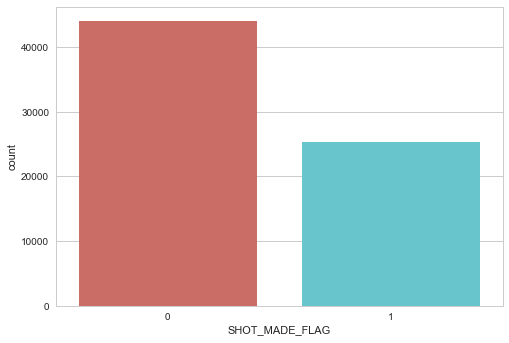

In [263]:
sns.countplot(x='SHOT_MADE_FLAG', data=df_shot_chart_detail_3s, palette='hls')
plt.show()
plt.savefig('count_plot')

In [264]:
df_shot_chart_detail_3s.groupby('SHOT_MADE_FLAG').mean()

,Catch and Shoot,Pull Up,22-24 ft.,25-34 ft.
SHOT_MADE_FLAG,,,,
0,0.868691,0.131309,0.369066,0.630934
1,0.844921,0.155079,0.395399,0.604601


In [265]:
df_shot_chart_detail_3s['SHOT_MADE_FLAG'] = df_shot_chart_detail_3s['SHOT_MADE_FLAG'].astype(bool)

/Users/ancho/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [320]:
data_final = df_shot_chart_detail_3s[['SHOT_MADE_FLAG', 'Catch and Shoot', 'Pull Up', '22-24 ft.', '25-34 ft.']]

In [321]:
data_final.head()

,SHOT_MADE_FLAG,Catch and Shoot,Pull Up,22-24 ft.,25-34 ft.
0,True,True,False,False,True
3,False,True,False,False,True
5,False,True,False,False,True
8,True,True,False,True,False
9,False,True,False,False,True


In [322]:
data_final_vars=data_final.columns.values.tolist()
y=['SHOT_MADE_FLAG']
X=[i for i in data_final_vars if i not in y]

In [323]:
data_final.columns.values

array([u'SHOT_MADE_FLAG', 'Catch and Shoot', 'Pull Up', '22-24 ft.',
       '25-34 ft.'], dtype=object)

In [324]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 4)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


In [325]:
X=data_final.drop('SHOT_MADE_FLAG', axis=1)
y=data_final['SHOT_MADE_FLAG']

In [326]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.655759
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         SHOT_MADE_FLAG   No. Observations:                69390
Model:                          Logit   Df Residuals:                    69387
Method:                           MLE   Df Model:                            2
Date:                Tue, 17 Jul 2018   Pseudo R-squ.:                0.001456
Time:                        19:40:03   Log-Likelihood:                -45503.
converged:                      False   LL-Null:                       -45569.
                                        LLR p-value:                 1.499e-29
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Catch and Shoot    -0.3347        nan        nan        nan         nan         nan
Pull Up            -0.1262        nan        nan  

/Users/ancho/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
